In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import rotate
from scipy.signal import savgol_filter
from tvxla import *
import time

In [2]:
### Parameter
ghxd = 2300 # gioi han x duoi
ghxt = 4300 # gioi han x tren
dd = ghxt - ghxd + 1
dr = 5 # do rong chia 2
y = [819, 1031, 1311, 1519, 1799, 2020]
goc = [183.25, 182.75, 181.25, 181.0, 180.0, 179.0]
ws = 3

filepath = 'D:\DataE\\20190722\\MO1\\'
phan = 'mo'

In [3]:
t = time.time()
kqd = np.zeros((dd, 6)).T
kqb = np.zeros((dd, 6)).T
kq = np.zeros((dd, 6)).T

for number in range(1,6,2):
    ad = np.zeros((dd, 6)).T
    ab = np.zeros((dd, 6)).T
    a = np.zeros((dd, 6)).T
    
    measurement = filepath + 'mau'  + str(number + 1) + '.jpg'
    base = filepath + 'mau'  + str(number) + '.jpg'
    print(base)
    for j in range(0,6,1):
        ab[j], ad[j], a[j] = xuliabs(base, measurement, y[j], goc[j], ghxd, ghxt, dr, ws, ptd = 1)
        print('Hoan thanh ' + str(int((j+1)/6*100)) + ' %' )
    
    print('\n')
    kqd = kqd + ad
    kqb = kqb + ab
    kq = kq + a

kqd = kqd/3.0
kqb = kqb/3.0
kq = kq/3.0

print ("done in ", time.time()- t)

D:\DataE\20190722\MO1\mau1.jpg
Hoan thanh 16 %
Hoan thanh 33 %
Hoan thanh 50 %
Hoan thanh 66 %
Hoan thanh 83 %
Hoan thanh 100 %


D:\DataE\20190722\MO1\mau3.jpg
Hoan thanh 16 %
Hoan thanh 33 %
Hoan thanh 50 %
Hoan thanh 66 %
Hoan thanh 83 %
Hoan thanh 100 %


D:\DataE\20190722\MO1\mau5.jpg
Hoan thanh 16 %
Hoan thanh 33 %
Hoan thanh 50 %
Hoan thanh 66 %
Hoan thanh 83 %
Hoan thanh 100 %


done in  231.42877411842346


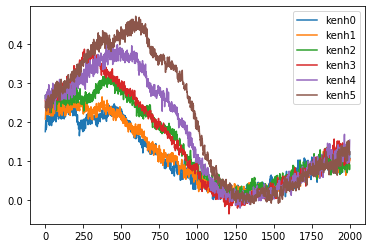

In [4]:
for i in range(0,6,1):
    plt.plot(kq[i], label='kenh' + str(i))
plt.legend(loc='upper right')
plt.show()

In [5]:
solieu = np.column_stack((kq[0], kq[1], kq[2], kq[3], kq[4], kq[5]))
filename = phan + '.csv'
df = pd.DataFrame(solieu)
df.to_csv(filepath + filename, index = False)

In [164]:
solieu = np.column_stack((kqd[0], kqd[1], kqd[2], kqd[3], kqd[4], kqd[5]))
df = pd.DataFrame(solieu)
df.to_csv(filepath + 'do.csv', index = False)

solieu = np.column_stack((kqb[0], kqb[1], kqb[2], kqb[3], kqb[4], kqb[5]))
df = pd.DataFrame(solieu)
df.to_csv(filepath + 'ba.csv', index = False)

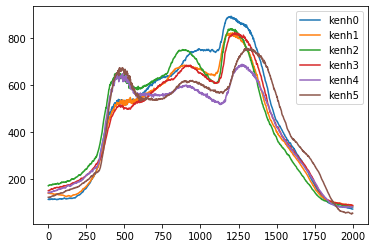

In [21]:
for i in range(0,6,1):
    plt.plot(kqb[i], label='kenh' + str(i))
plt.legend(loc='upper right')
plt.show()